<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5440_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Accuracy: 75.29%
SVM Accuracy: 67.32%
MLP Accuracy: 77.13%


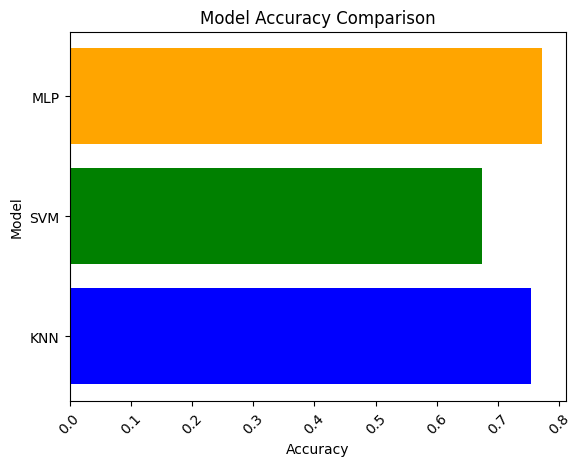

In [2]:
################################################################################
#Author: Arif H. Zaidy                                                         #
#Date: February 24, 2025                                                       #
#Course: CPSC 5440                                                             #
#Topic: Assignment 1                                                           #
#Description:                                                                  #
#This program classifies words into English, German, or Spanish using machine  #
#learning models.                                                              #
#It loads word lists, converts them into numerical features, and trains the    #
#classifiers (KNN, SVM, MLP), after that it evaluates their accuracy.          #
################################################################################

# Import the python libraries
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import urllib.request

# Function to load word lists from a URL with specified encoding
def load_words(file_path, encoding="utf-8"):
    with urllib.request.urlopen(file_path) as response:
        return [line.decode(encoding).strip() for line in response.readlines()]

# Load English, German, and Spanish word lists
engl_words = load_words("https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/english.txt")
grmn_words = load_words("https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/german.txt", encoding="latin1")
span_words = load_words("https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/spanish.txt")

# Function to filter only 5-letter words
def fltr_five_lttr_wrds(word_list):
    return [word for word in word_list if len(word) == 5]

# Apply filtering to each language list
engl_words = fltr_five_lttr_wrds(engl_words)
grmn_words = fltr_five_lttr_wrds(grmn_words)
span_words = fltr_five_lttr_wrds(span_words)

# Assign numerical labels: English = 0, German = 1, Spanish = 2
engl_lbls = [0] * len(engl_words)
grmn_lbls = [1] * len(grmn_words)
span_lbls = [2] * len(span_words)

# Combine all words and labels into a single dataset
all_words = engl_words + grmn_words + span_words
all_labels = engl_lbls + grmn_lbls + span_lbls

# Function to create character mapping for each language
def crt_chr_mapng(language):
    if language == "english":
        alphabet = 'abcdefghijklmnopqrstuvwxyz'
    elif language == "german":
        alphabet = 'abcdefghijklmnopqrstuvwxyzäöüß'
    elif language == "spanish":
        alphabet = 'abcdefghijklmnopqrstuvwxyzáéíóúüñ'
    else:
        raise ValueError("Unsupported language")

    # Assign a unique number to each character
    mapping = {char: idx for idx, char in enumerate(alphabet, start=1)}
    return mapping

# Create character mappings for each language
engl_mapng = crt_chr_mapng("english")
grmn_mapng = crt_chr_mapng("german")
span_mapng = crt_chr_mapng("spanish")

# Function to convert words into numerical features based on language mappings
def word_to_features(word, language):
    if language == 0:
        mapping = engl_mapng
    elif language == 1:
        mapping = grmn_mapng
    elif language == 2:
        mapping = span_mapng
    else:
        raise ValueError("Unsupported language label")

    return [mapping.get(char.lower(), 0) for char in word]  # Convert characters to numbers

# Convert all words into numerical feature vectors
features = [word_to_features(word, label) for word, label in zip(all_words, all_labels)]

# Create a DataFrame for features and labels
data = pd.DataFrame(features)
data['label'] = all_labels  # Add language labels as the target variable

# Ensure all sequences have uniform length by padding missing values with zeros
data = data.apply(lambda row: row.fillna(0), axis=1)

# Split dataset into training and testing sets
X = data.iloc[:, :-1]  # Features (word representations)
y = data['label']       # Labels (language classification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define machine learning models for classification
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

# Plot accuracy comparison of models
colors = ['blue', 'green', 'orange']
plt.barh(list(results.keys()), list(results.values()), color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()